# Bigmart sales prediction

In this model we have to predict the sales of the items of big mart.

#### importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### reading train data and test data

In [2]:
train_data = pd.read_csv('Big Mart Sales.csv')
train_data1 = pd.read_csv('Big Mart Sales.csv')
test_data = pd.read_csv('Test.csv')

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train_data.shape,test_data.shape

((8523, 12), (5681, 11))

#### checking null values

In [6]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### treating null values

In [8]:
train_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [9]:
for i in train_data['Item_Type'].unique():
    li = list(train_data[(train_data['Item_Weight'].isnull()) & (train_data['Item_Type'] == i)].index)
    train_data['Item_Weight'][li] = train_data['Item_Weight'][train_data['Item_Type'] == i].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
for i in test_data['Item_Type'].unique():
    li = list(test_data[(test_data['Item_Weight'].isnull()) & (test_data['Item_Type'] == i)].index)
    test_data['Item_Weight'][li] = test_data['Item_Weight'][test_data['Item_Type'] == i].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
train_data.drop('Outlet_Size', axis=1, inplace=True)

In [12]:
test_data.drop('Outlet_Size', axis=1, inplace=True)

#### label encoding

In [13]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for i in train_data.columns:
    if isinstance(train_data[i][0], str):
        train_data[i] = encoder.fit_transform(train_data[i])

In [14]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for i in test_data.columns:
    if isinstance(test_data[i][0], str):
        test_data[i] = encoder.fit_transform(test_data[i])

#### checking skewness in output


 mu = 2181.288913575032 and sigma = 1706.3995013565955



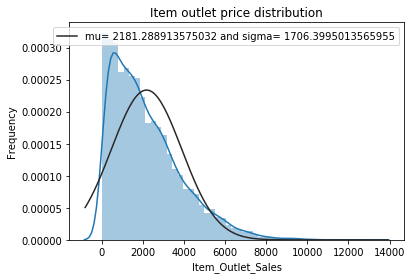

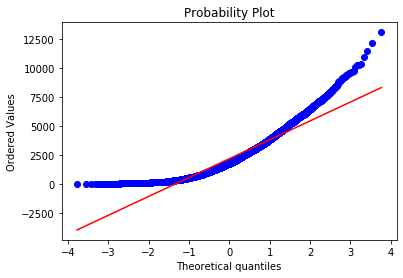

In [15]:
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(train_data['Item_Outlet_Sales'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_data['Item_Outlet_Sales'])
print( f'\n mu = {mu} and sigma = {sigma}\n')

#Now plot the distribution
plt.legend([f'mu= {mu} and sigma= {sigma}'],
            loc='best')
plt.ylabel('Frequency')
plt.title('Item outlet price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_data['Item_Outlet_Sales'], plot=plt)
plt.show()


 mu = 7.2965402512610025 and sigma = 1.0170485783401055



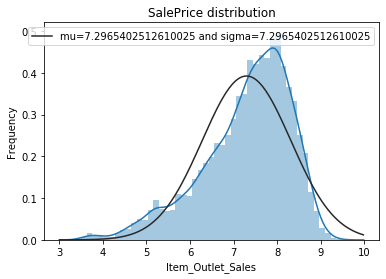

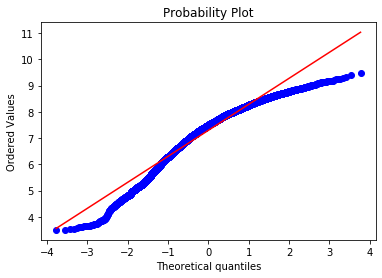

In [16]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train_data["Item_Outlet_Sales"] = np.log(train_data["Item_Outlet_Sales"])

#Check the new distribution 
sns.distplot(train_data['Item_Outlet_Sales'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_data['Item_Outlet_Sales'])
print( f'\n mu = {mu} and sigma = {sigma}\n')

#Now plot the distribution
plt.legend([f'mu={mu} and sigma={mu}'],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_data['Item_Outlet_Sales'], plot=plt)
plt.show()

#### checking for correlation in data

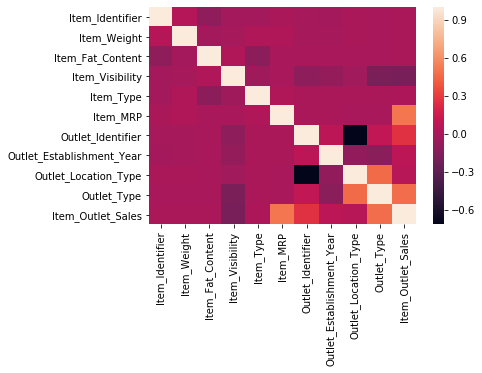

In [17]:
sns.heatmap(train_data.corr())

In [18]:
train_data.drop('Outlet_Location_Type',axis=1,inplace=True)
test_data.drop('Outlet_Location_Type',axis=1,inplace=True)

#### checking for outliers

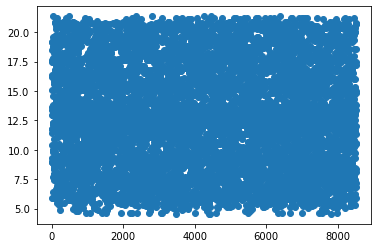

In [19]:
plt.scatter(train_data['Item_Weight'].index,train_data['Item_Weight'])

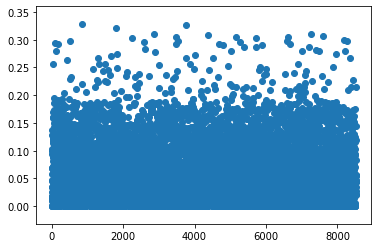

In [20]:
plt.scatter(train_data['Item_Visibility'].index,train_data['Item_Visibility'])

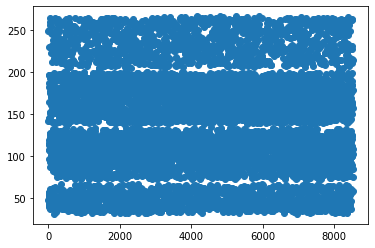

In [21]:
plt.scatter(train_data['Item_MRP'].index, train_data['Item_MRP'])

In [22]:
X = train_data.drop('Item_Outlet_Sales', axis = 1)
y = train_data['Item_Outlet_Sales']

#### checking correlation in input

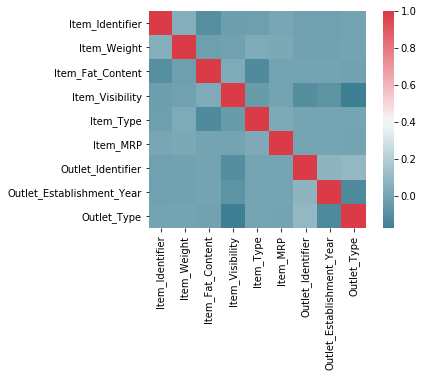

In [23]:
sns.heatmap(X.corr(), mask=np.zeros_like(X.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

#### checking vif

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X_vif = add_constant(X)
pd.Series([variance_inflation_factor(X_vif.values,i) for i in range(X_vif.shape[1])], index=X_vif.columns)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                        58974.405825
Item_Identifier                  1.014421
Item_Weight                      1.004941
Item_Fat_Content                 1.024943
Item_Visibility                  1.050245
Item_Type                        1.017794
Item_MRP                         1.001890
Outlet_Identifier                1.024929
Outlet_Establishment_Year        1.032833
Outlet_Type                      1.060661
dtype: float64

#### checking anova an correlation coefficient

In [25]:
column = X.columns
column = column.drop(['Item_Weight','Item_Visibility','Item_MRP'])

In [26]:
from scipy import stats
pd.Series([stats.f_oneway(X[i],y) for i in column], index = column)

Item_Identifier                                (25198.3824803495, 0.0)
Item_Fat_Content                             (206459.64194396828, 0.0)
Item_Type                    (2.2174040565749613, 0.13648084451126813)
Outlet_Identifier                             (6217.408876306685, 0.0)
Outlet_Establishment_Year                    (474826705.16086763, 0.0)
Outlet_Type                                  (189743.33649906804, 0.0)
dtype: object

In [27]:
colm = ['Item_Weight','Item_Visibility','Item_MRP']
pd.Series([np.abs(X[i].corr(y)) for i in colm], index = colm)

Item_Weight        0.007835
Item_Visibility    0.193064
Item_MRP           0.509671
dtype: float64

#### normalising the data

In [28]:
from sklearn.preprocessing import normalize
X = normalize(X)
test_data = normalize(test_data)

#### splitting the train data

In [29]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y, test_size=.3, random_state =12)

## training data

#### using random forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200,max_depth=5)

In [31]:
rfr.fit(train_X,train_y)
rfr.score(train_X,train_y)*100

74.29040052014294

In [32]:
rfr.score(test_X,test_y)*100

73.73670779166291

#### using xgboost

In [33]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=80,max_depth=3)

In [34]:
xgb.fit(train_X,train_y)
xgb.score(train_X,train_y)*100

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:38:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


75.75253379819641

In [35]:
xgb.score(test_X,test_y)*100

74.17882940081806

###### xgboost giving better result so we use xgboost

In [36]:
xgb.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:38:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=80,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

#### making prediction on test data

In [37]:
xgb_results=xgb.predict(test_data)

In [38]:
xgb_results=np.exp(xgb_results)

In [39]:
xgb_results = pd.DataFrame(xgb_results, columns=['Item_Outlet_Sell'])

#### Final result

In [40]:
xgb_results

,Item_Outlet_Sell
0,1507.412720
1,1249.468628
2,511.809113
3,2238.562500
4,5686.158203
5,1702.441772
6,609.644897
7,2158.987061
8,1262.428955
9,2801.989746


In [ ]:
column = 

In [44]:
for i in column:
    print(train_data1.groupby(i).mean()['Item_Outlet_Sales'])

Item_Identifier
DRA12    1843.600200
DRA24    2246.218971
DRA59    2614.430150
DRB01    1518.024000
DRB13    2428.838400
DRB24    3050.695600
DRB25    1661.503900
DRB48     622.903457
DRC01     862.211000
DRC12    2237.420900
DRC13    1632.042250
DRC24    3152.895900
DRC25    1128.816343
DRC27    2743.428900
DRC36    3011.812880
DRC49    2828.318400
DRD01     851.025560
DRD12    1576.709514
DRD13    1232.681143
DRD15    2522.811314
DRD24    1965.156257
DRD25    1740.234750
DRD27    1269.813760
DRD37     892.172000
DRD49    3634.935100
DRD60    2605.275400
DRE01    2908.214400
DRE03     648.298971
DRE12    1546.875333
DRE13    1552.512440
            ...     
NCX05    1274.341200
NCX06    2897.561600
NCX17    3340.096667
NCX18    2413.049429
NCX29    1950.211425
NCX30    3921.562000
NCX41    2364.255800
NCX42    2631.241600
NCX53    2056.323300
NCX54    1678.672029
NCY05     670.460600
NCY06    2375.041760
NCY17     874.328560
NCY18    3229.721822
NCY29     749.857250
NCY30    2942.8360

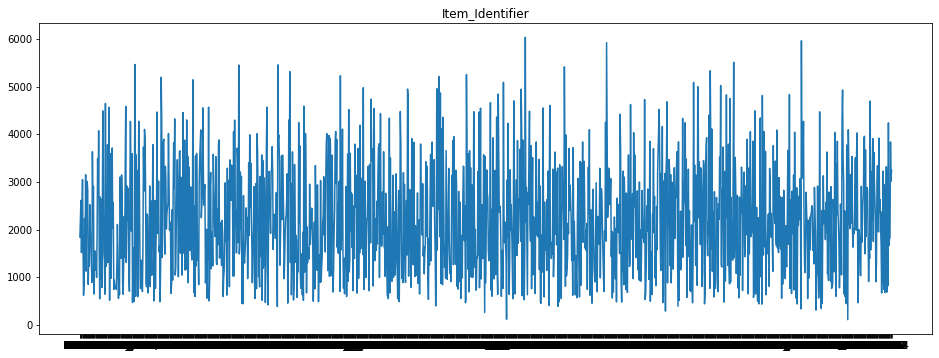

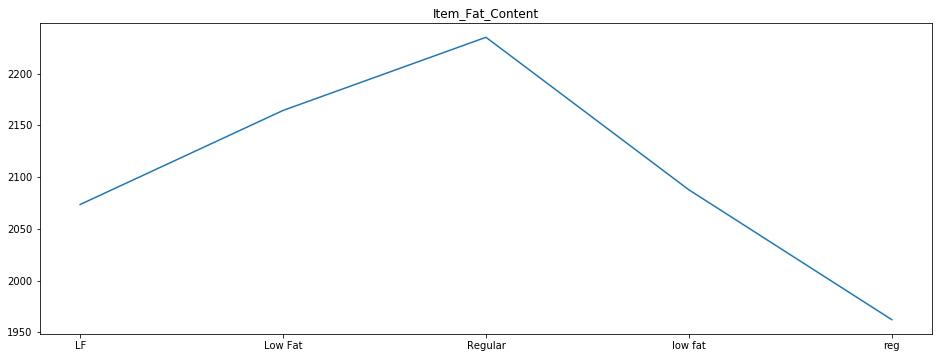

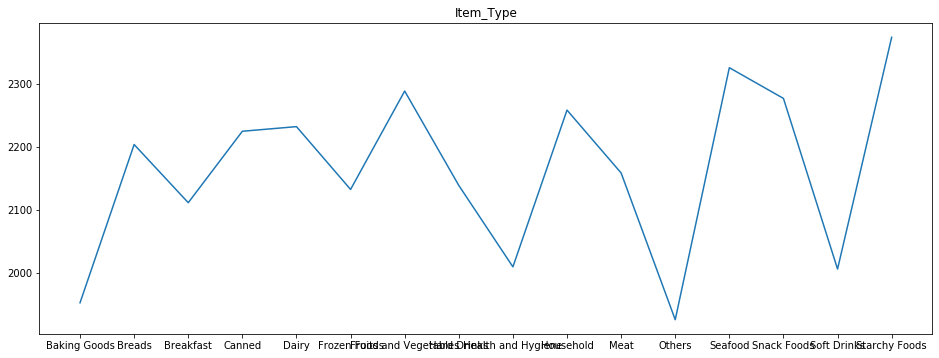

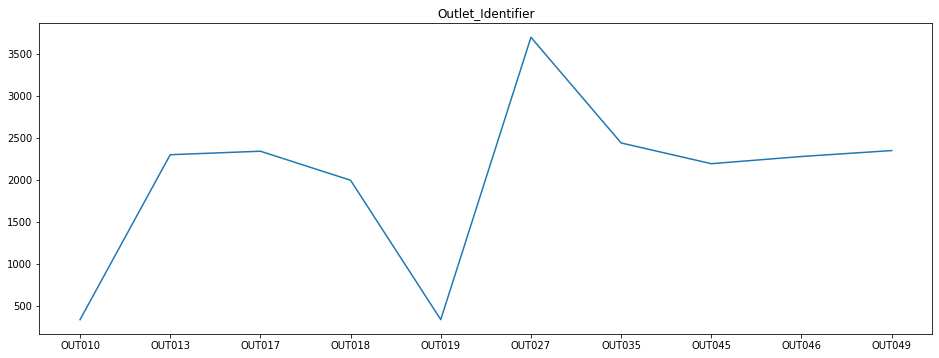

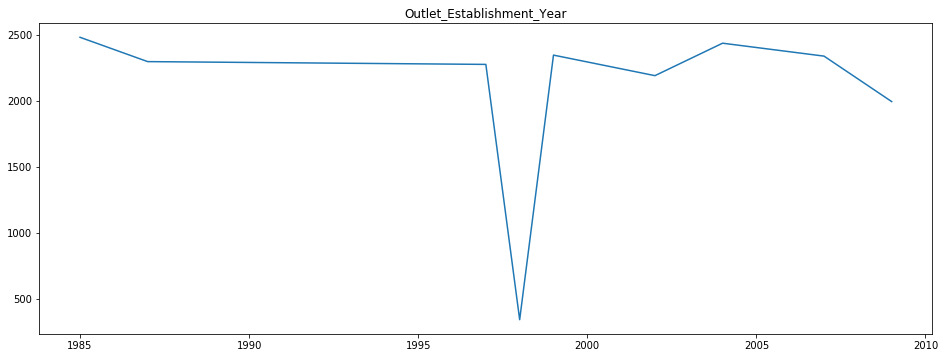

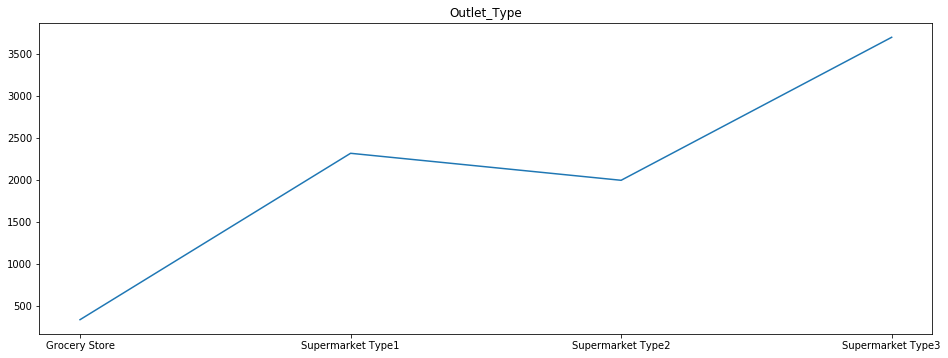

In [48]:
for i,j in zip(column,range(1,len(column)+1)):
    plt.figure(figsize=(16,40))
    plt.subplot(len(column),1,j)
    plt.plot(train_data1.groupby(i).mean()['Item_Outlet_Sales'].index,train_data1.groupby(i).mean()['Item_Outlet_Sales'])
    plt.title(i)